In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

from tqdm.notebook import tqdm

In [28]:
img = imageio.imread('cat-color.png')

In [29]:
print(img.shape)

(667, 730, 3)


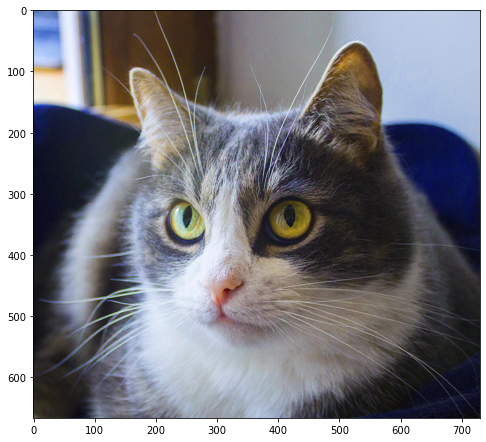

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

# Получение ЧБ изображения по цветному¶


Wall time: 8.31 s


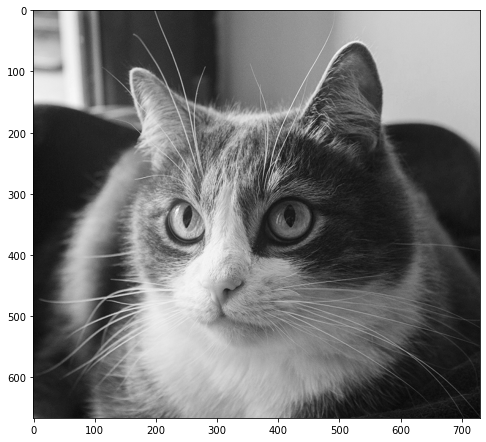

In [37]:
%%time
#Мой пример

def color_to_bw(img):
    img_bw = np.zeros((img.shape[0], img.shape[1]), dtype='uint16')
    for i in tqdm(range(img.shape[0])):
        for j in range(img.shape[1]):
            img_bw[i][j] += img[i][j][0]
            img_bw[i][j] += img[i][j][1]
            img_bw[i][j] += img[i][j][2]
            img_bw[i][j] /= 3            
    return img_bw.astype(np.uint8)
    

img_bw = color_to_bw(img)

plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

Wall time: 30 ms


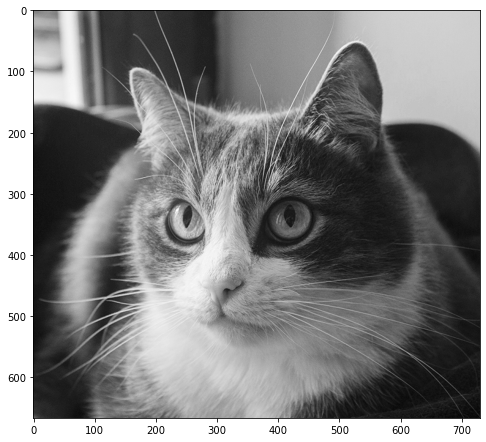

In [39]:
%%time
#Пример урока

img_bw = np.mean(img, axis=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

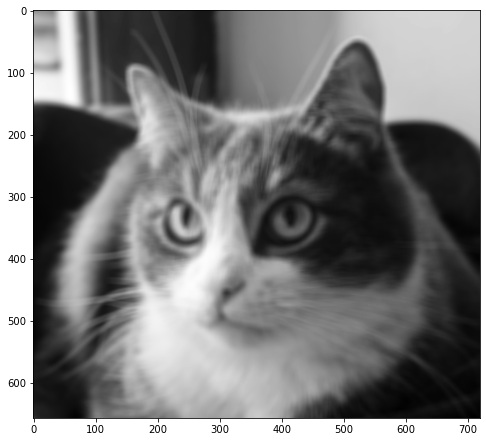

In [46]:
def image_filter(img, matrix_filter):
    matrix_filter = np.array(matrix_filter, dtype='float')
    img = np.array(img, dtype='float')/255
    
    img_filter = np.zeros((img.shape[0]-matrix_filter.shape[0]+1, 
                           img.shape[1]-matrix_filter.shape[1]+1), 
                          dtype='float')
        
    for i in range(img_filter.shape[0]):
        for j in range(img_filter.shape[1]):
            x = img[i:i+matrix_filter.shape[0], j:j+matrix_filter.shape[1]]
            img_filter[i,j] = np.sum(matrix_filter * x)
            
    return img_filter

# Box blur
matrix_filter = np.ones((11, 11), dtype='float')     
plt.figure(figsize=(8, 8))
plt.imshow(image_filter(img_bw, matrix_filter), cmap='gray')

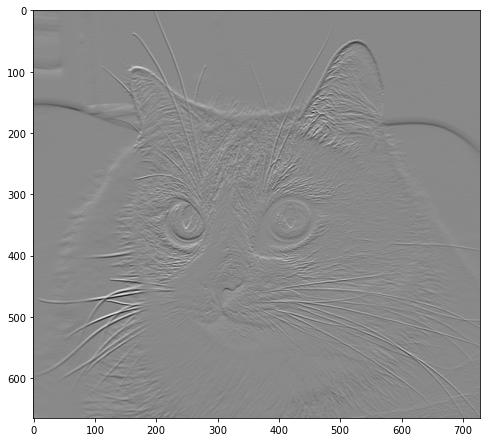

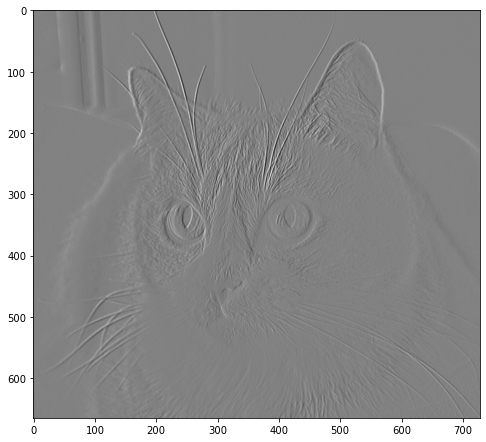

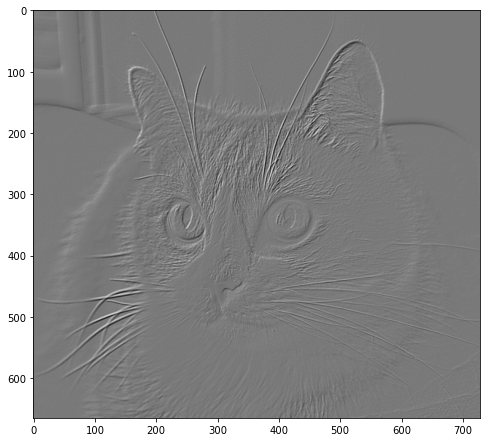

In [50]:
# Поиск границ

matrix_filter = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]], dtype='float')     

vertical_border = image_filter(img_bw, matrix_filter)
plt.figure(figsize=(8, 8))
plt.imshow(vertical_border, cmap='gray')

matrix_filter = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]], dtype='float')     

horizontal_border = image_filter(img_bw, matrix_filter)
plt.figure(figsize=(8, 8))
plt.imshow(horizontal_border, cmap='gray')

plt.figure(figsize=(8, 8))
plt.imshow(vertical_border + horizontal_border, cmap='gray')

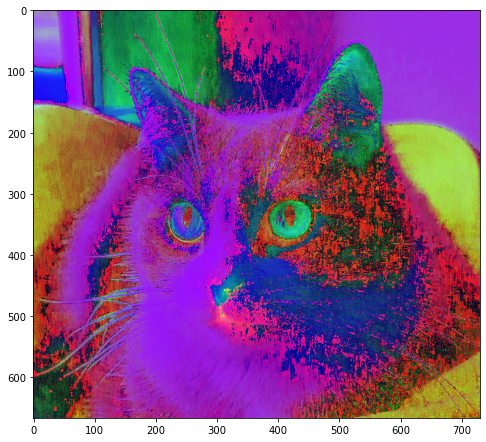

In [56]:
def rgb_to_hsv(img):
    img = np.array(img, dtype='float')/255
    
    hsv = np.zeros((img.shape[0], 
                    img.shape[1],
                    3), 
                    dtype='float')
        
    for i in range(hsv.shape[0]):
        for j in range(hsv.shape[1]):
            r = img[i][j][0]
            g = img[i][j][1]
            b = img[i][j][2]
            
            high = np.max(img[i][j])
            low = np.min(img[i][j])
            
            h, s, v = high, high, high
            d = high - low            
            s = 0 if high == 0 else d/high
            
            if high == low:
                h = 0.0
            else:
                h = {
                    r: (g - b) / d + (6 if g < b else 0),
                    g: (b - r) / d + 2,
                    b: (r - g) / d + 4,
                }[high]
                h /= 6
                
            hsv[i][j][0] = h
            hsv[i][j][1] = s
            hsv[i][j][2] = v    
                
    return hsv

img_hsv = rgb_to_hsv(img)
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

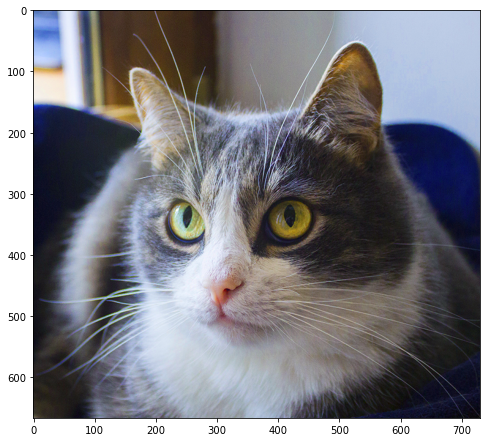

In [58]:
def hsv_to_rgb(hsv):    
    img = np.zeros((hsv.shape[0], 
                    hsv.shape[1],
                    3), 
                    dtype='float')
        
    for i in range(hsv.shape[0]):
        for j in range(hsv.shape[1]):
            h = hsv[i][j][0]
            s = hsv[i][j][1]
            v = hsv[i][j][2]
            
            k = np.floor(h*6)
            f = h*6 - k
            p = v * (1-s)
            q = v * (1-f*s)
            t = v * (1-(1-f)*s)

            r, g, b = [
                (v, t, p),
                (q, v, p),
                (p, v, t),
                (p, q, v),
                (t, p, v),
                (v, p, q),
            ][int(k%6)]

            img[i][j][0] = r
            img[i][j][1] = g
            img[i][j][2] = b   
                
    return img

img = hsv_to_rgb(img_hsv)
plt.figure(figsize=(8, 8))
plt.imshow(img)